CTGAN

https://github.com/sdv-dev/CTGAN/blob/main/README.md

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CTGAN/

Mounted at /content/drive
/content/drive/MyDrive/CTGAN


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CTGAN/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Drop rows with missing values
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)

# Separate features and target
X = df.drop("income", axis=1)
y = df["income"]

# Encode categorical features
X_encoded = pd.get_dummies(X)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [5]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7940 - loss: 0.4332 - val_accuracy: 0.8384 - val_loss: 0.3420
Epoch 2/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8506 - loss: 0.3200 - val_accuracy: 0.8438 - val_loss: 0.3320
Epoch 3/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8558 - loss: 0.3112 - val_accuracy: 0.8516 - val_loss: 0.3326
Epoch 4/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8569 - loss: 0.3033 - val_accuracy: 0.8475 - val_loss: 0.3302
Epoch 5/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8630 - loss: 0.2984 - val_accuracy: 0.8492 - val_loss: 0.3359
Epoch 6/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.2977 - val_accuracy: 0.8469 - val_loss: 0.3460
Epoch 7/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8660 - loss: 0.2920 - val_accuracy: 0.8485 - val_loss: 0.3359
Epoch 8/10
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.2874 - val_accuracy: 0.

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.3356
Test Accuracy: 0.85


85%

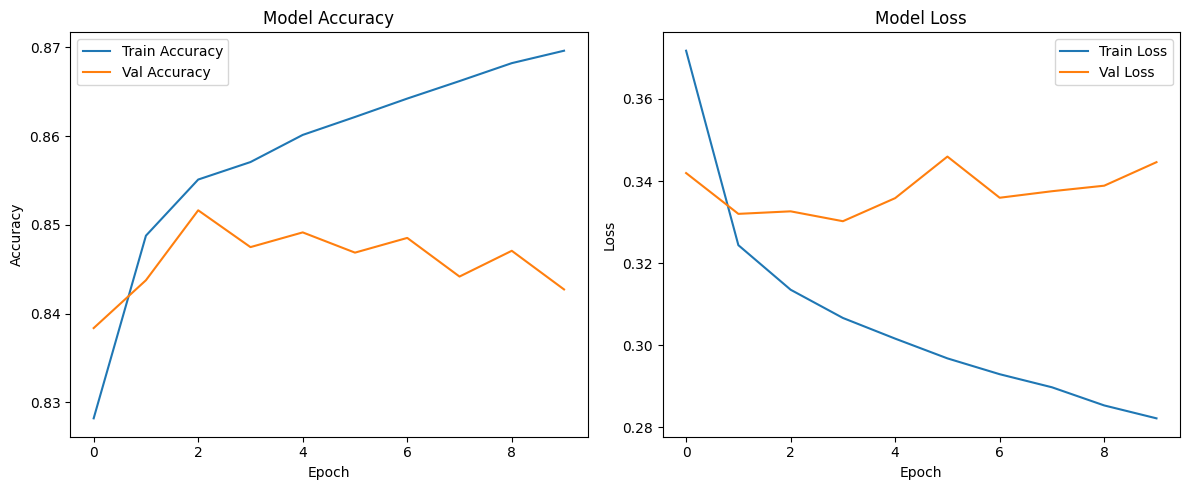

In [7]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()